In [6]:
# Load the data
import pandas as pd

df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Show first 5 rows
df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


Average headline length: 73.12051490484095
Max headline length: 512


<Axes: >

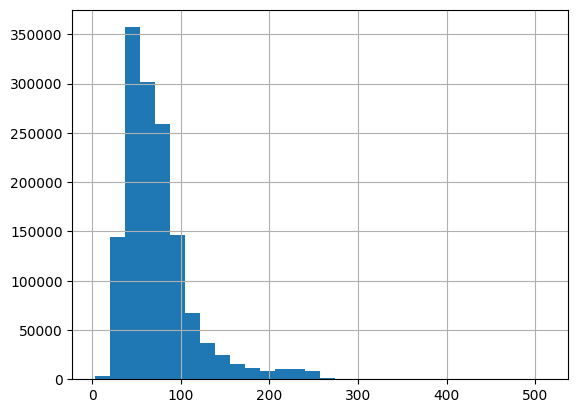

In [10]:
# How long are headlines?
df['headline_length'] = df['headline'].str.len()
print("Average headline length:", df['headline_length'].mean())
print("Max headline length:", df['headline_length'].max())

# Plot distribution
df['headline_length'].hist(bins=30)

Top 5 publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


<Axes: ylabel='publisher'>

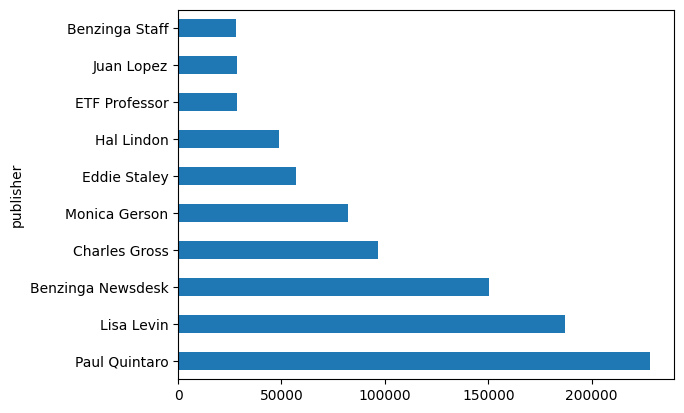

In [11]:
# Which publishers are most active?
publisher_counts = df['publisher'].value_counts()
print("Top 5 publishers:")
print(publisher_counts.head())

# Plot
publisher_counts.head(10).plot(kind='barh')

<Axes: title={'center': 'News Publication Frequency Over Time'}, xlabel='publish_date'>

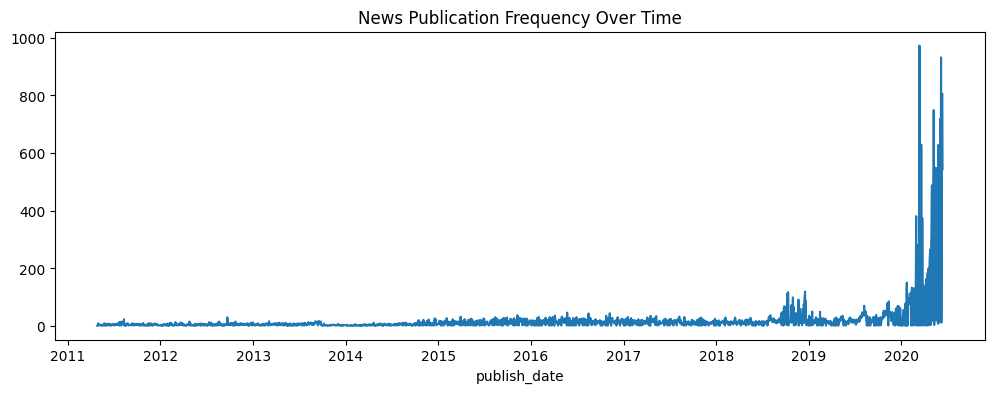

In [14]:
# Convert 'date' to datetime, coercing errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date (ignore time for now)
df['publish_date'] = df['date'].dt.date

# Count articles per day
daily_counts = df['publish_date'].value_counts().sort_index()

# Plot over time
daily_counts.plot(figsize=(12, 4), title='News Publication Frequency Over Time')

In [13]:
from collections import Counter
import re

# Combine all headlines
text = ' '.join(df['headline'].fillna('').astype(str))

# Clean: keep only letters
clean_text = re.sub(r'[^a-zA-Z\s]', ' ', text).lower()

# Split into words
words = clean_text.split()

# Remove short/common words
stop_words = {'the', 'and', 'to', 'of', 'a', 'in', 'for', 'on', 'is', 'as', 'with', 'at', 'by', 'from', 'stock', 'shares', 'price'}
filtered_words = [w for w in words if len(w) > 3 and w not in stop_words]

# Top 20 words
word_freq = Counter(filtered_words)
print("Top 20 words in headlines:")
print(word_freq.most_common(20))

Top 20 words in headlines:
[('stocks', 161776), ('market', 120560), ('reports', 108711), ('update', 91723), ('earnings', 87399), ('sales', 79648), ('benzinga', 74516), ('week', 69572), ('announces', 66591), ('downgrades', 61959), ('trading', 61183), ('raises', 57802), ('upgrades', 56811), ('target', 54717), ('maintains', 52961), ('down', 50063), ('higher', 48286), ('after', 45393), ('session', 45349), ('says', 43134)]


In [15]:
# Check if any publishers look like emails
import re

def extract_domain(pub):
    if pd.isna(pub):
        return 'Unknown'
    # If it contains '@', extract domain
    match = re.search(r'@([a-zA-Z0-9.-]+)', str(pub))
    if match:
        return match.group(1).lower()
    return 'Other'

df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count domains
domain_counts = df['publisher_domain'].value_counts()
print("Top publisher domains:")
print(domain_counts.head(10))

Top publisher domains:
publisher_domain
Other                     1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


In [17]:
# Create a simple summary
summary = {
    "Total Articles": len(df),
    "Unique Publishers": df['publisher'].nunique(),
    "Date Range": f"{df['date'].min()} to {df['date'].max()}",
    "Avg Headline Length": round(df['headline_length'].mean(), 1),
    "Top Publisher": df['publisher'].value_counts().index[0],
    "Top Word": word_freq.most_common(1)[0][0]
}

print("\n--- TASK 1 EDA SUMMARY ---")
for key, value in summary.items():
    print(f"{key}: {value}")


--- TASK 1 EDA SUMMARY ---
Total Articles: 1407328
Unique Publishers: 1034
Date Range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00
Avg Headline Length: 73.1
Top Publisher: Paul Quintaro
Top Word: stocks
